# test2

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import multiprocessing as mp
import time
import numpy as np
import glob
import re
import glob
sys.path.insert(0, '/Users/hailinpan/Documents/git_lab/npspy')
import npspy as nps

In [4]:
config = nps.io.read_ini_file_as_config('step01_config.ini')
all_peps = config.sections()
all_peps

['6X_GS9_Ctrl_5bp_beads',
 '9X_2nt_GS9_Ctrl_5bp_beads',
 '6X_GS9_Ctrl_5bp_PAGE',
 '9X_2nt_GS9_Ctrl_5bp_PAGE']

In [3]:
dfs = []
for aa in all_peps:
    print(aa)
    obj = nps.io.read_pickle(f'../00.data/{aa}.pkl')
    nps.tl.set_att_for_an_obj(obj, atts=['median_of_I/I0'], in_place=True)
    df = pd.DataFrame([[read_id, read_obj['median_of_I/I0']] for read_id, read_obj in obj.items()])
    df.columns = ['read_id', 'median_of_I/I0']
    df['aa'] = aa
    dfs.append(df)
dfs = pd.concat(dfs, ignore_index=True)
dfs.to_csv('../03.tables/all_median_I2I0.csv')
dfs

6X_GS9_Ctrl_5bp_beads
9X_2nt_GS9_Ctrl_5bp_beads
6X_GS9_Ctrl_5bp_PAGE
9X_2nt_GS9_Ctrl_5bp_PAGE


,read_id,median_of_I/I0,aa
0,20250109110935_channel1_start_end_270255_39511...,0.187273,6X_GS9_Ctrl_5bp_beads
1,20250109110935_channel1_start_end_941015_10091...,0.471091,6X_GS9_Ctrl_5bp_beads
2,20250109110935_channel1_start_end_2999592_3002...,0.952314,6X_GS9_Ctrl_5bp_beads
3,20250109110935_channel1_start_end_4578565_4692...,0.419677,6X_GS9_Ctrl_5bp_beads
4,20250109110935_channel1_start_end_5041259_5102...,0.137449,6X_GS9_Ctrl_5bp_beads
...,...,...,...
42066,20250109111154_channel256_start_end_34698359_3...,0.078104,9X_2nt_GS9_Ctrl_5bp_PAGE
42067,20250109111154_channel256_start_end_34862775_3...,0.081433,9X_2nt_GS9_Ctrl_5bp_PAGE
42068,20250109111154_channel256_start_end_35144896_3...,0.094424,9X_2nt_GS9_Ctrl_5bp_PAGE
42069,20250109111154_channel256_start_end_35309591_3...,0.078753,9X_2nt_GS9_Ctrl_5bp_PAGE


In [8]:
dfs = pd.read_csv('../03.tables/all_median_I2I0.csv', index_col=0)
dfs['aa'] = pd.Categorical(dfs['aa'], categories=all_peps)
dfs

,read_id,median_of_I/I0,aa
0,20250109110935_channel1_start_end_270255_39511...,0.187273,6X_GS9_Ctrl_5bp_beads
1,20250109110935_channel1_start_end_941015_10091...,0.471091,6X_GS9_Ctrl_5bp_beads
2,20250109110935_channel1_start_end_2999592_3002...,0.952314,6X_GS9_Ctrl_5bp_beads
3,20250109110935_channel1_start_end_4578565_4692...,0.419677,6X_GS9_Ctrl_5bp_beads
4,20250109110935_channel1_start_end_5041259_5102...,0.137449,6X_GS9_Ctrl_5bp_beads
...,...,...,...
42066,20250109111154_channel256_start_end_34698359_3...,0.078104,9X_2nt_GS9_Ctrl_5bp_PAGE
42067,20250109111154_channel256_start_end_34862775_3...,0.081433,9X_2nt_GS9_Ctrl_5bp_PAGE
42068,20250109111154_channel256_start_end_35144896_3...,0.094424,9X_2nt_GS9_Ctrl_5bp_PAGE
42069,20250109111154_channel256_start_end_35309591_3...,0.078753,9X_2nt_GS9_Ctrl_5bp_PAGE


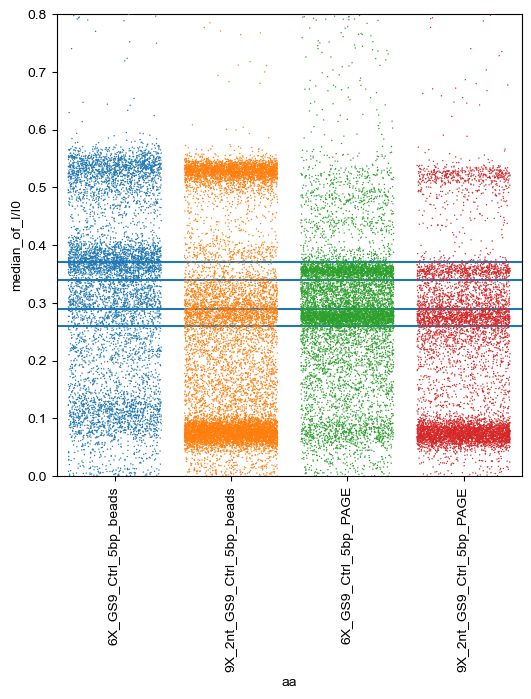

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=dfs, x="aa", y="median_of_I/I0", ax=ax, size=1, hue='aa', jitter=0.4)
plt.xticks(rotation=90)
plt.ylim(0,0.8)
plt.axhline(0.26)
plt.axhline(0.29)
plt.axhline(0.34)
plt.axhline(0.37)
plt.savefig('../04.figures/I2I0_stripplot.pdf', bbox_inches='tight')

# 画出6X_GS9_Ctrl_5bp_PAGE两个区段的随机图

In [19]:
aa = '6X_GS9_Ctrl_5bp_PAGE'
obj = nps.io.read_pickle(f'../00.data/{aa}.pkl')

In [45]:
low_stripe_read_ids = dfs.loc[(dfs['aa'] == '6X_GS9_Ctrl_5bp_PAGE') & (dfs['median_of_I/I0']>=0.26) & (dfs['median_of_I/I0']<=0.29), 'read_id'].sample(n=100, random_state=0).to_list()
low_stripe_obj = nps.tl.extract_reads_as_an_obj(obj, read_ids=low_stripe_read_ids)
nps.pl.draw_all_reads_in_an_obj(low_stripe_obj, save_dir=f'../04.figures/{aa}/low_stripe', save_file_name_postfix='.png', scale_by_openpore=True)

In [44]:
high_stripe_read_ids = dfs.loc[(dfs['aa'] == '6X_GS9_Ctrl_5bp_PAGE') & (dfs['median_of_I/I0']>=0.34) & (dfs['median_of_I/I0']<=0.37), 'read_id'].sample(n=100, random_state=0).to_list()
high_stripe_obj = nps.tl.extract_reads_as_an_obj(obj, read_ids=high_stripe_read_ids)
nps.pl.draw_all_reads_in_an_obj(high_stripe_obj, save_dir=f'../04.figures/{aa}/high_stripe', save_file_name_postfix='.png', scale_by_openpore=True)

In [43]:
dfs.loc[(dfs['aa'] == '6X_GS9_Ctrl_5bp_PAGE') & (dfs['median_of_I/I0']>=0.34) & (dfs['median_of_I/I0']<=0.37),:]

,read_id,median_of_I/I0,aa
21908,20250109111001_channel1_start_end_1503512_1620...,0.362976,6X_GS9_Ctrl_5bp_PAGE
21911,20250109111001_channel1_start_end_2330433_2438...,0.348423,6X_GS9_Ctrl_5bp_PAGE
21912,20250109111001_channel1_start_end_2714877_2848...,0.342555,6X_GS9_Ctrl_5bp_PAGE
21930,20250109111001_channel1_start_end_8946633_8986...,0.358989,6X_GS9_Ctrl_5bp_PAGE
21936,20250109111001_channel1_start_end_10281424_104...,0.363268,6X_GS9_Ctrl_5bp_PAGE
...,...,...,...
33295,20250109111001_channel253_start_end_27050123_2...,0.360007,6X_GS9_Ctrl_5bp_PAGE
33298,20250109111001_channel253_start_end_27888986_2...,0.366761,6X_GS9_Ctrl_5bp_PAGE
33304,20250109111001_channel253_start_end_29536632_2...,0.353290,6X_GS9_Ctrl_5bp_PAGE
33309,20250109111001_channel253_start_end_30835978_3...,0.352420,6X_GS9_Ctrl_5bp_PAGE


In [39]:
np.logical_and?

Signature:       np.logical_and(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'logical_and'>
File:            ~/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/numpy/__init__.py
Docstring:      
logical_and(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Compute the truth value of x1 AND x2 element-wise.

Parameters
----------
x1, x2 : array_like
    Input arrays.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the inpu